# Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
(train_X, train_y),(test_X, test_y) = datasets.cifar10.load_data()

In [ ]:
train_X.shape

(50000, 32, 32, 3)

In [ ]:
train_X[0].shape

(32, 32, 3)

In [ ]:
train_y[0]

array([6], dtype=uint8)

# Plot the images

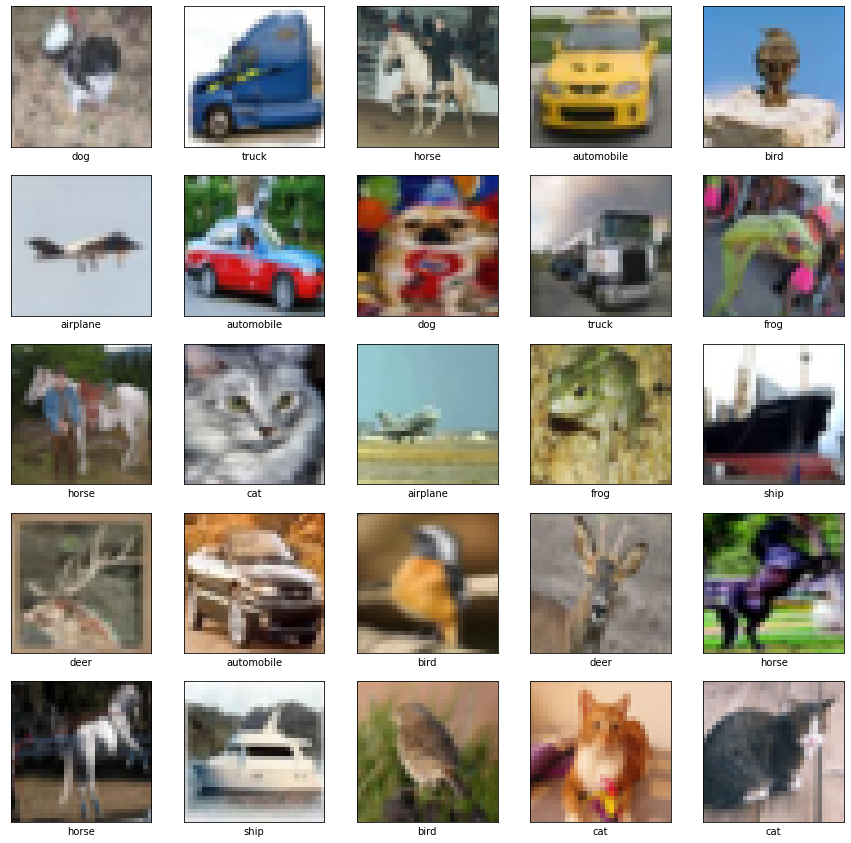

In [ ]:
plt.figure(figsize = (15,15))

for i in range(25):
  idx = np.random.randint(0,train_X.shape[0])

  plt.subplot(5,5,i+1)
  plt.imshow(train_X[idx])
  plt.xticks([])
  plt.yticks([])

  plt.xlabel(class_names[train_y[idx][0]])

# Preprocessing

In [ ]:
train_X[0][0].shape

(32, 3)

In [ ]:
train_X[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [ ]:
train_X = train_X/255.0
test_X = test_X/255.0

In [ ]:
train_X[0][0].shape

(32, 3)

In [ ]:
train_X[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

In [ ]:
train_X[0][0].min()

0.16470588235294117

In [ ]:
train_X[0][0].max()

0.6588235294117647

# Architecture Building

In [ ]:
from keras.regularizers import l1

In [ ]:
model = models.Sequential()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.05))

model.add(layers.Conv2D(128, (3, 3), activation='relu',activity_regularizer=l1(0.0001)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

# Build optimizer and train

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_X, train_y,
                    epochs = 20, 
                    validation_data = (test_X, test_y))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4401 - accuracy: 0.4749 - val_loss: 1.1607 - val_accuracy: 0.5930
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1002 - accuracy: 0.6115 - val_loss: 1.0458 - val_accuracy: 0.6380
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9714 - accuracy: 0.6594 - val_loss: 0.9288 - val_accuracy: 0.6755
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8813 - accuracy: 0.6902 - val_loss: 0.9156 - val_accuracy: 0.6843
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8106 - accuracy: 0.7142 - val_loss: 0.9076 - val_accuracy: 0.6864
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7589 - accuracy: 0.7327 - val_loss: 0.8510 - val_accuracy: 0.7112
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7158 - accuracy: 0.7473 - val_loss: 0.8578 - val_accuracy:

# Plot Learning Curves

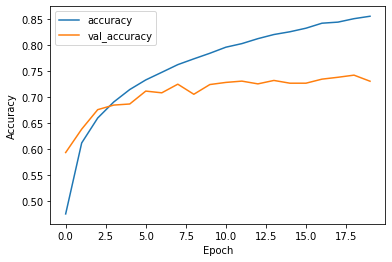

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

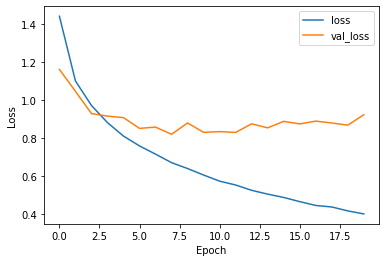

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

#Testing the accuracy
print(test_acc)

313/313 - 1s - loss: 0.9226 - accuracy: 0.7302
0.7301999926567078
